In [1]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.style.use('ggplot')

In [2]:
files = glob('WN_test_varying_resol/WN*b_*spc')

ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus,lbs,viscs, Pms, Ns, kps = dns.get_data_MHD(files)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)
idx_sort = np.argsort(kps)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)


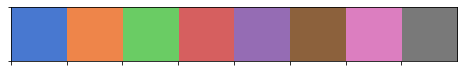

In [3]:
sns.palplot(sns.color_palette('muted',8))

In [4]:
def resolution_check(f_NH):
    

    ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
    idx_sort = np.argsort(Pms)
    ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
    colors = sns.color_palette('muted',len(f_NH))
    for id_f, f in enumerate(f_NH):
        lu = lus[id_f]
        lb = lbs[id_f]
        Pm = Pms[id_f]
        N = Ns[id_f]
        visc = viscs[id_f]
        kmax = ks[id_f].max()
        time = times[id_f]
        plt.plot(time,kmax*lu,c=colors[id_f],lw=2,label='{} {} {}'.format(N,visc,Pm))
        plt.plot(time,kmax*lb,c=colors[id_f])
        if (True in (kmax * lu < 1.25 )) or (True in (kmax * lb < 1.25 )):
            print(f)
        
    plt.legend()
    plt.hlines(1.25,0,5,color='0.7',ls='--')
    plt.xlim(0.01,5)
    plt.yscale('log')
    plt.xscale('log')
    #plt.ylim(0.6,2)
    plt.show()

# Comparing different k_peaks and different viscs with Pm=1

In [10]:
files

array(['WN_test_varying_resol/WN5_long.b_1024_0.0004_1.spc',
       'WN_test_varying_resol/WN5.b_512_0.0009_1.spc',
       'WN_test_varying_resol/WN5.b_512_0.001_1.spc',
       'WN_test_varying_resol/WN5.b_256_0.003_1.spc',
       'WN_test_varying_resol/WN5.b_128_0.006_1.spc',
       'WN_test_varying_resol/WN5.b_128_0.009_1.spc',
       'WN_test_varying_resol/WN20.b_1024_0.0004_1.spc',
       'WN_test_varying_resol/WN20.b_512_0.0009_1.spc',
       'WN_test_varying_resol/WN20.b_512_0.001_1.spc',
       'WN_test_varying_resol/WN20.b_256_0.003_1.spc',
       'WN_test_varying_resol/WN20.b_128_0.006_1.spc',
       'WN_test_varying_resol/WN20.b_128_0.009_1.spc',
       'WN_test_varying_resol/WN100.b_1024_0.0004_1.spc',
       'WN_test_varying_resol/WN100.b_1024_0.0009_1.spc',
       'WN_test_varying_resol/WN100.b_1024_0.001_1.spc',
       'WN_test_varying_resol/WN100.b_1024_0.003_1.spc'], dtype='<U50')

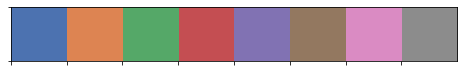

In [8]:
sns.palplot(sns.color_palette('deep',8))

In [9]:

for id_f, f in enumerate(files):
    Lu = Lus[id_f]
    U = Us[id_f]
    visc = viscs[id_f]
    kp = kps[id_f]
    T = Lu/U
    print('T ={:.3f} \t kp = {} \t visc = {}'.format(T[0],kp,visc))

T =0.780 	 kp = 5.0 	 visc = 0.0004
T =0.780 	 kp = 5.0 	 visc = 0.0009
T =0.780 	 kp = 5.0 	 visc = 0.001
T =0.780 	 kp = 5.0 	 visc = 0.003
T =0.780 	 kp = 5.0 	 visc = 0.006
T =0.780 	 kp = 5.0 	 visc = 0.009
T =0.194 	 kp = 20.0 	 visc = 0.0004
T =0.195 	 kp = 20.0 	 visc = 0.0009
T =0.195 	 kp = 20.0 	 visc = 0.001
T =0.195 	 kp = 20.0 	 visc = 0.003
T =0.196 	 kp = 20.0 	 visc = 0.006
T =0.196 	 kp = 20.0 	 visc = 0.009
T =0.039 	 kp = 100.0 	 visc = 0.0004
T =0.039 	 kp = 100.0 	 visc = 0.0009
T =0.039 	 kp = 100.0 	 visc = 0.001
T =0.039 	 kp = 100.0 	 visc = 0.003


In [10]:
#assign colors depending on the different kp values

tags = [int(kp) if kp.is_integer() else kp for kp in kps]
ls = ['-' for i in range(len(files))]
colors = []
_colors = sns.color_palette('deep',8)
for kp in kps:
    if kp == 5:
        colors.append(_colors[0])
    elif kp == 20:
        colors.append(_colors[2])
    else:
        colors.append(_colors[3])


WN_test_varying_resol/WN5_long.b_1024_0.0004_1.spc
WN_test_varying_resol/WN5.b_512_0.0009_1.spc
WN_test_varying_resol/WN5.b_512_0.001_1.spc
WN_test_varying_resol/WN5.b_256_0.003_1.spc
WN_test_varying_resol/WN5.b_128_0.006_1.spc


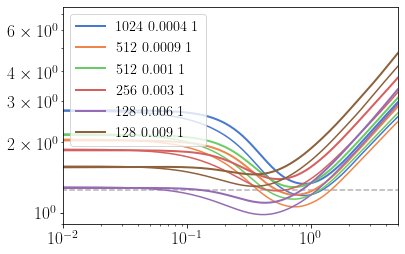

In [11]:
resolution_check(files[:6])

WN_test_varying_resol/WN5_long.b_1024_0.0004_1.spc
25.0
WN_test_varying_resol/WN5.b_512_0.0009_1.spc
5.0
WN_test_varying_resol/WN5.b_512_0.001_1.spc
5.0
WN_test_varying_resol/WN5.b_256_0.003_1.spc
5.0
WN_test_varying_resol/WN5.b_128_0.006_1.spc
5.0
WN_test_varying_resol/WN5.b_128_0.009_1.spc
5.0
WN_test_varying_resol/WN20.b_1024_0.0004_1.spc
5.0
WN_test_varying_resol/WN20.b_512_0.0009_1.spc
5.0
WN_test_varying_resol/WN20.b_512_0.001_1.spc
5.0
WN_test_varying_resol/WN20.b_256_0.003_1.spc
5.0
WN_test_varying_resol/WN20.b_128_0.006_1.spc
5.0
WN_test_varying_resol/WN20.b_128_0.009_1.spc
5.0
WN_test_varying_resol/WN100.b_1024_0.0004_1.spc
5.0
WN_test_varying_resol/WN100.b_1024_0.0009_1.spc
5.0
WN_test_varying_resol/WN100.b_1024_0.001_1.spc
5.0
WN_test_varying_resol/WN100.b_1024_0.003_1.spc
5.0


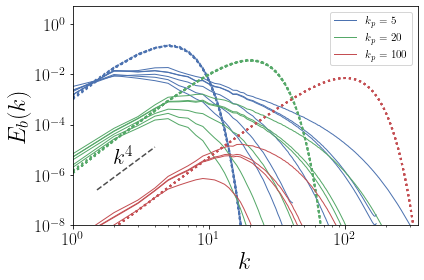

In [12]:
# Produce spectrum evolution Hardcoded times and label starting index
fig, ax = plt.subplots()
t = [0,367]

for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    print(f)
    print(time[-1])
    
    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=2,ls=':',)
        else:
            if idx in [0,6,12]:
                ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='$k_p$ = {}'.format(int(kp)))
            else:
                ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='__nolegend__')
k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-8*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-6,'$k^{4}$',size=22)
k2_slope = np.array([10,40])
#ax.plot(k2_slope,7e-3*np.power(k_slope,-2),c='0.3',ls='-')
#ax.plot(k2_slope,5e-2*np.power(k_slope,-3/2),c='0.3',ls='--')
#ax.plot(k2_slope,5e-1*np.power(k_slope,-5/3),c='0.3',ls=':')
#ax.text(30,3e-2,'$k^{-2}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,5)
ax.set_xlim(1,341)
ax.legend(loc=1,fontsize=11)
fig.tight_layout()
#fig.savefig('Spectrum.pdf',format='pdf')

In [10]:
import pandas as pd

In [20]:
Res = []
k_maxs = []
NHs = []
for id_f,f in enumerate(files):
    Res.append(int(Us[idx][0]*Lus[id_f][0]/viscs[id_f]))
    k_maxs.append(ks[id_f][-1])
    NHs.append('NH\textsubscript{$k_p$}')


df= pd.DataFrame({'Run':NHs,'$P_m$': Pms,'$\\nu$': viscs,'$Re$': Res,'$k_p$': kps.astype(int), '$N$':Ns})
df = df.round({'$\\nu$': 5,'$Re$': 1,'$P_m$': 5,'$k_p$': 1, '$N$':0})
print(df.to_latex(index = False,escape=False))


\begin{tabular}{lrrrrr}
\toprule
                     Run &  $P_m$ &   $\nu$ &  $Re$ &  $k_p$ &   $N$ \\
\midrule
 NH\textsubscript{$k_p$} &      1 &  0.0004 &   805 &      5 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0009 &   358 &      5 &   512 \\
 NH\textsubscript{$k_p$} &      1 &  0.0010 &   322 &      5 &   512 \\
 NH\textsubscript{$k_p$} &      1 &  0.0030 &   107 &      5 &   256 \\
 NH\textsubscript{$k_p$} &      1 &  0.0060 &    53 &      5 &   128 \\
 NH\textsubscript{$k_p$} &      1 &  0.0090 &    35 &      5 &   128 \\
 NH\textsubscript{$k_p$} &      1 &  0.0004 &   201 &     20 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0009 &    89 &     20 &   512 \\
 NH\textsubscript{$k_p$} &      1 &  0.0010 &    80 &     20 &   512 \\
 NH\textsubscript{$k_p$} &      1 &  0.0030 &    26 &     20 &   256 \\
 NH\textsubscript{$k_p$} &      1 &  0.0060 &    13 &     20 &   128 \\
 NH\textsubscript{$k_p$} &      1 &  0.0090 &     8 &     20 &   128 \\
 NH\textsubscript{$k_p

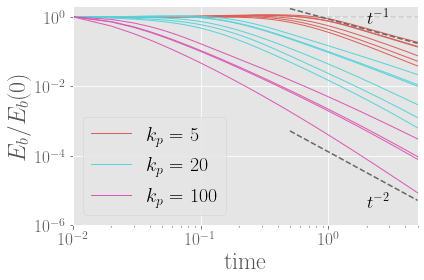

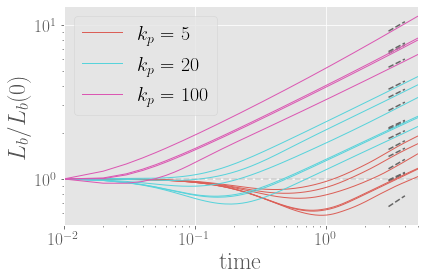

In [162]:
#produce time decay plots hardcoded 
fig, axE = plt.subplots()
figL, axL = plt.subplots()
p = []
q = []
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    if idx in [0,6,12]:
        axE.plot(time,B/B[1],c=colors[idx],lw=1,label= '$k_p$ = {}'.format(tags[idx]))
        axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='$k_p$ = {}'.format(tags[idx]))
    else:
        axE.plot(time,B/B[1],c=colors[idx],lw=1,label='__nolegend__')
        axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='__nolegend__')
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    #axE.plot(t_lines,y,ls='--',c='0.4')
    #axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    #axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   

    
t_lines = np.array([0.5,2,5])
    
y = np.power(t_lines,-1)*np.exp(bp)/B[1]*2e3
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1.5,'$t^{-1}$',size=18)
y = np.power(t_lines,-2)*np.exp(bp)/B[1]*3e-1
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1e-1,'$t^{-2}$',size=18)

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_b(0)$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/L_b(0)$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)

axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
axE.set_ylim(1e-6,2)
fig.tight_layout()
fig.savefig('Eb_vs_t_WN.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

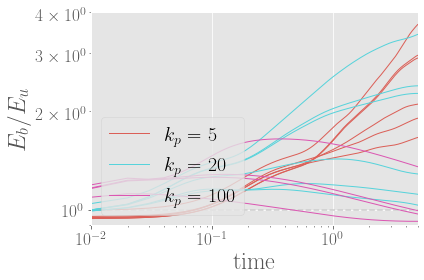

In [163]:
#produce time decay plots hardcoded 
figr, axr = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    E = Es[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    if idx in [0,6,12]:
        axr.plot(time,B/E,c=colors[idx],lw=1,label= '$k_p$ = {}'.format(tags[idx]))
    else:
        axr.plot(time,B/E,c=colors[idx],lw=1,label='__nolegend__')
     
    t_lines = np.array([3,3.5,4])
    
   

    
t_lines = np.array([0.5,2,5])

p = np.array(p)
q = np.array(q)

axr.set_xscale('log')
axr.set_yscale('log')
axr.set_ylabel('$E_{b}/E_u$',size = 24)
axr.set_xlabel('time',size = 24)

axr.legend(fontsize=20,loc=3)
axr.hlines(1,1e-2,6,linestyles = '--',colors = '0.8')
axr.set_xlim(1e-2,5)
axr.set_ylim(9e-1,4)

figr.tight_layout()
#fig.savefig('Eb_vs_t_WN.pdf',format='pdf')
#figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


To = 0.78
To = 0.78
To = 0.78
To = 0.78
To = 0.78
To = 0.78
To = 0.19
To = 0.19
To = 0.19
To = 0.19
To = 0.20
To = 0.20
To = 0.04
To = 0.04
To = 0.04
To = 0.04


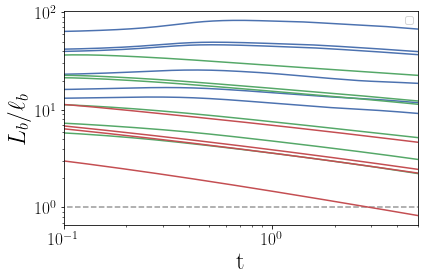

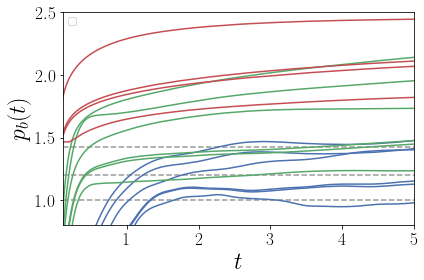

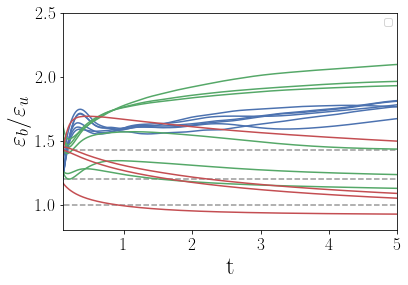

In [13]:
# n over time


figE, axE = plt.subplots()
fign, axn = plt.subplots()
figx,axx = plt.subplots()

#col_NH = sns.color_palette('hls',len(files))

for id_f,f in enumerate(files):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f] 
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    axE.plot(time, Lb/lb, color=colors[id_f])
    axn.plot(time[1:],n, color=colors[id_f])
    axx.plot(time,epsb/epsu,color=colors[id_f])
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$L_{b}/\ell_b$',size = 24)
axE.set_xlabel('t',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-1,5)

#axn.set_xscale('log')
#axn.set_yscale('log')
axn.set_ylabel('$p_b(t)$',size = 24)
axn.set_xlabel('$t$',size = 24)
axn.legend(fontsize=10)
axn.hlines([1,10/7,6/5],1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(1e-1,5)
axn.set_ylim(0.8,2.5)

#axn.set_xscale('log')
#axn.set_yscale('log')
axx.set_ylabel('$\\varepsilon_b/\\varepsilon_u$',size = 24)
axx.set_xlabel('t',size = 24)
axx.legend(fontsize=10)
axx.hlines([1,10/7,6/5],1e-4,1e3,linestyles = '--',colors = '0.6')
axx.set_xlim(1e-1,5)
axx.set_ylim(0.8,2.5)

figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
fign.tight_layout()
#fign.savefig('Lb_vs_t_DNS.pdf',format='pdf')

plt.show()

kp = 5.0     , visc = 0.0004 	 p = 1.02 	 q = 0.43
kp = 5.0     , visc = 0.0009 	 p = 1.11 	 q = 0.40
kp = 5.0     , visc = 0.001 	 p = 1.13 	 q = 0.40
kp = 5.0     , visc = 0.003 	 p = 1.38 	 q = 0.50
kp = 5.0     , visc = 0.006 	 p = 1.38 	 q = 0.42
kp = 5.0     , visc = 0.009 	 p = 1.45 	 q = 0.44
kp = 20.0    , visc = 0.0004 	 p = 1.24 	 q = 0.41
kp = 20.0    , visc = 0.0009 	 p = 1.42 	 q = 0.39
kp = 20.0    , visc = 0.001 	 p = 1.45 	 q = 0.39
kp = 20.0    , visc = 0.003 	 p = 1.73 	 q = 0.43
kp = 20.0    , visc = 0.006 	 p = 1.92 	 q = 0.42
kp = 20.0    , visc = 0.009 	 p = 2.10 	 q = 0.42
kp = 100.0   , visc = 0.0004 	 p = 1.80 	 q = 0.43
kp = 100.0   , visc = 0.0009 	 p = 2.04 	 q = 0.45
kp = 100.0   , visc = 0.001 	 p = 2.08 	 q = 0.45
kp = 100.0   , visc = 0.003 	 p = 2.44 	 q = 0.49


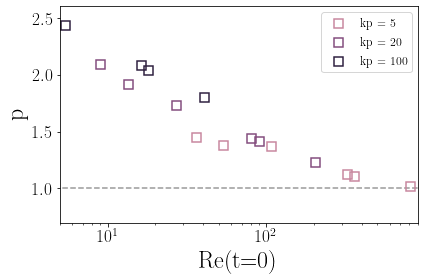

In [14]:
#plt.style.use('ggplot')
fig,ax = plt.subplots()
p_colors = sns.cubehelix_palette(4)

    
p = []
q = []
ti = 350
Res = []
Flag5 = True
Flag20 = True
Flag100 = True
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    visc = viscs[idx]
    Va = Vas[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Re = Lu[0]*U[0]/visc
    Res.append(Re)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    mp, bp = np.polyfit(np.log(time[ti:]), np.log(B[ti:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:]), np.log(Lb[ti:]), 1)
    q.append(mq)
    print('kp = {:<8}, visc = {} \t p = {:.2f} \t q = {:.2f}'.format(kp,visc,-mp,mq))
    
    if kp == 5:
        col = p_colors[1]
    elif kp ==20:
        col = p_colors[2]
    else:
        col = p_colors[3]
    if (kp == 5) and (Flag5 == True):
        label = 'kp = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = 'kp = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='kp = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    ax.plot(Re, -mp,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col,label= label)
    
        #ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))
p = np.array(p)
q = np.array(q)




ax.set_xscale('log',basex=10)
ax.set_ylabel('p',size = 24)
ax.set_xlabel('Re(t=0)',size = 24)
ax.legend(loc=1,fontsize=12)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(5,900)
ax.set_ylim(0.7,2.6)
fig.tight_layout()
#fig.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()



# We can set Re(0) from the start using $\dfrac{2(2E_{uo}/3)^{1/2}}{k_p\nu}$